## Becoming a DataVizard exercise 

This is an exercise about data visualization, welcome! You will use common python libraries, Matplotlib and Seaborn to create effective and clear visualizations. You will work with two datasets: a dataset containing information about the top ten grossing movies in each year, and a dataset with information about the population in Swiss communes. 

These are the visualizations we will make, and that you will use to solve the exercise:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Log-log](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html)

In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook. We will make simple visualizations, but you will notice that all of the visualizations consider many optional parameters. You are encouraged to explore them, and modify them to make the most efficient visualizations, and match your desired style.

Beyond Matplotlib and Seaborn, there are many more resources that might be useful for you, for example:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) and [Folium](https://python-visualization.github.io/folium/)

Create your custom signature colorpalettes:
- [coolors](https://coolors.co/)

In [2]:
# Let's load necessary libraries and the datasets
# "pip install seaborn" if necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './Data/'


movies = pd.read_csv(data_folder+'blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

commune_pop = pd.read_excel(data_folder+'communes_pop.xls',skiprows=5,skipfooter=7,
                            sheet_name='2017',names=['commune','population_Jan',
                                                     'birth_alive','death','natrual_increase',
                                                     'arrivals','departure','migratory_balance',
                                                     'divergence_statistic','population_Dec','variation_num',
                                                     'variation_ratio'])

pop_per_commune = commune_pop[[name.startswith('......') for name in commune_pop.commune]].copy()

/var/folders/9t/5ml_m_x53vs0ydn7wx7l76l80000gn/T/ipykernel_10093/2042323856.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


### Note:
#### In case you have trouble opening the "communes_pop.xls" file, try installing an input library: "pip install openpyxl"

# 1. Tutorial: Using data visualization libraries

We will use the blockbusters dataset. Summary of the features:
- *Main_Genre*: the primary genre of the movie
- *Genre_2*
- *Genre_3*
- *imdb_rating*
- *length*: movie length in minutes
- *rank_in_year*: rank among the top 10 movies released that year
- *rating*: audience rating
- *studio*: the studio that produced the movie
- *title*: movie title
- *worldwide_gross*: total worldwide revenue in dollars
- *year*: year of release


## Visualizing a single variable

- First we will see how to visualize a single variable using matplotlib library. Let's focus on "Worldwide gross revenue" column of the dataframe and inspect the distribution, using histogram and boxplot.
- Notice the use of  plt.xlabel(), plt.ylabel(), plt.title() - every visualization should have axis labeled, and a title!
- plt.hist() takes a couple of important arguments: bins - the number of bins, and range - the range of values considered in the histogram.

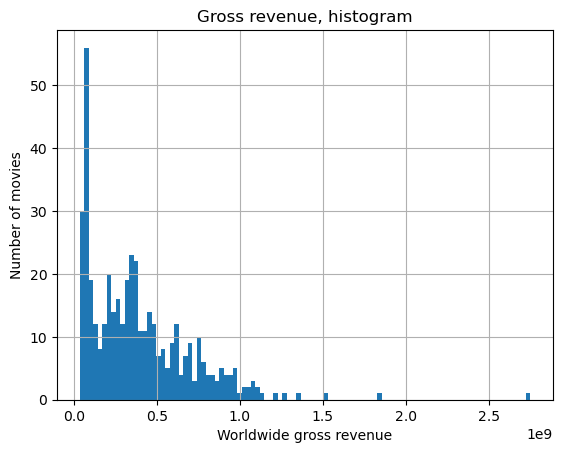

In [2]:
#we use pandas wrapper
movies['worldwide_gross'].hist(bins = 100)

#alternatively, we can use matplotlib directly
#plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('Number of movies')
plt.title('Gross revenue, histogram');

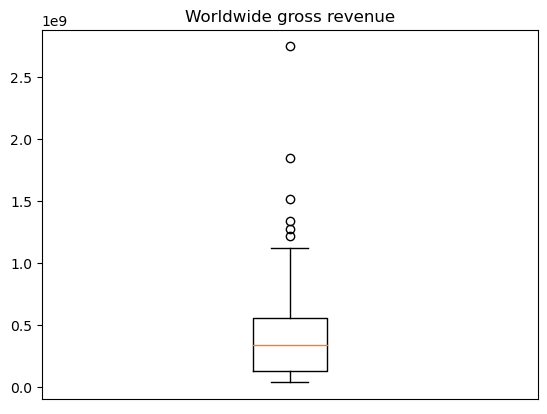

In [3]:
plt.boxplot(movies['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');

## Visualizing two continuous variables

- Let's see if blockbusters with higher ratings also make more revenue!
- There are many ways how a relationship between two variables can be examined. The simplest one is a scatterplot, using plt.scatterplot().

Text(0, 0.5, 'IMDB rating')

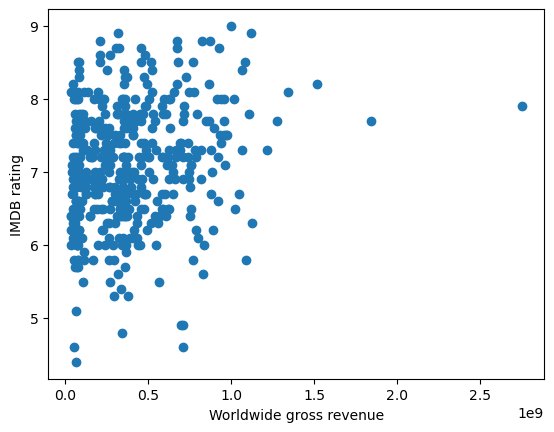

In [4]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'])

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

- Visually examining the plot, how do you interpret the relationship between revenue and IMDB rating?
- Markers indicatig the datapoints seem too large, and we cannot get a sense of the distribution in the area of the plot where the markers are overlapping.
- We'll try to make the markers smaller by specifying a small "s" size parameter.

Text(0, 0.5, 'IMDB rating')

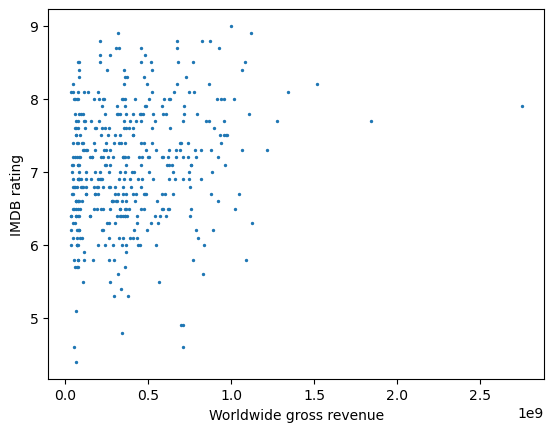

In [5]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'], s = 2)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

- Do you notice anything strange? What could be the reason?

Scatterplots are not useful when the number of datapoints is very large, as it becomes hard to interpret it. Seaborn library offers many alternative effective ways of visualizing join distributions. 

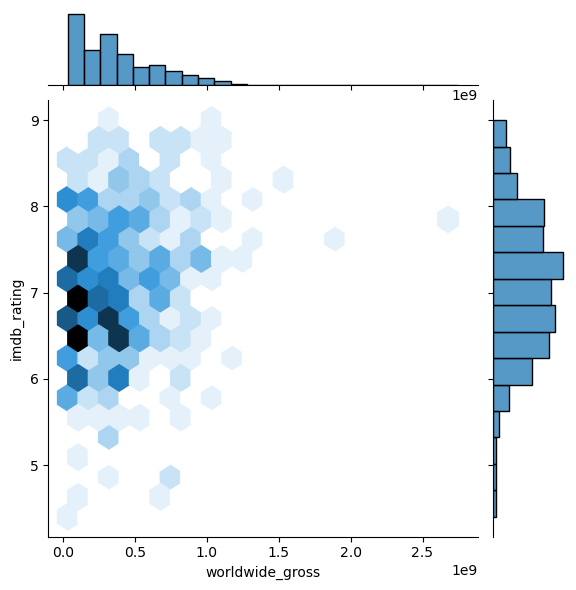

In [6]:
sns.jointplot(x=movies['worldwide_gross'], y=movies['imdb_rating'], kind="hex")

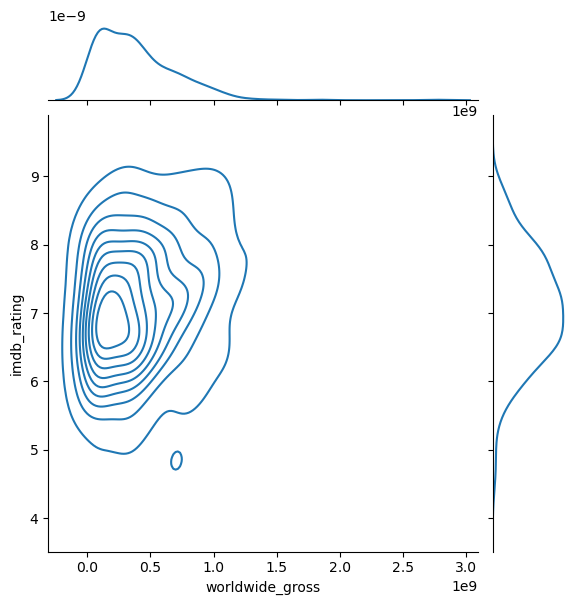

In [7]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="kde")


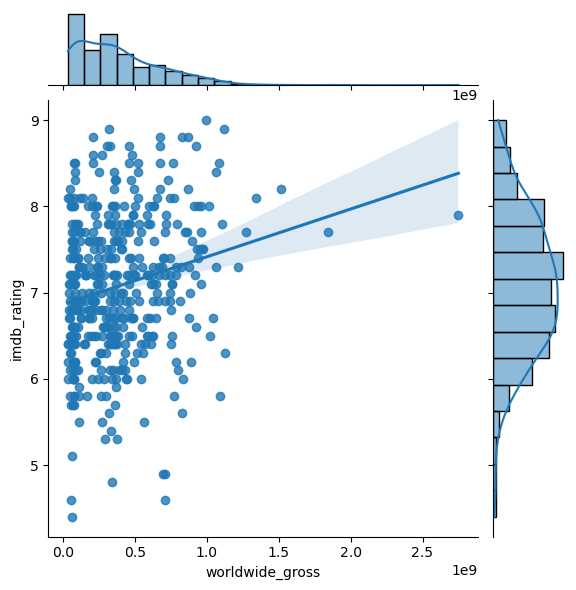

In [8]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="reg")

## Visualizing two variables, continuous and categorical

- Let's consider the five most prevalent genres, and examine the revenue.
- We'll show barplot (we get errorbars by default, how neat!), boxplot, and violinplot. Seaborn offers many more compelling visualizations. We will stop here, but see the gallery for more examples: https://seaborn.pydata.org/examples/index.html

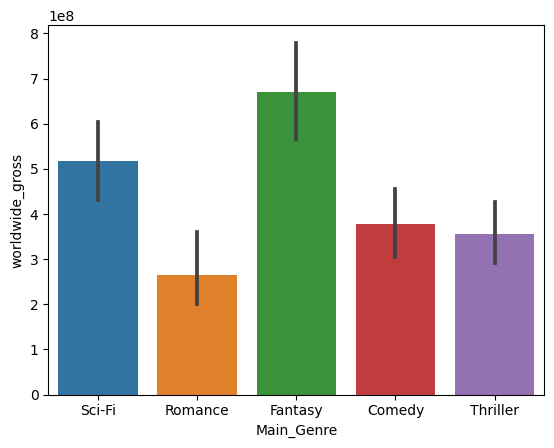

In [9]:
ax = sns.barplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

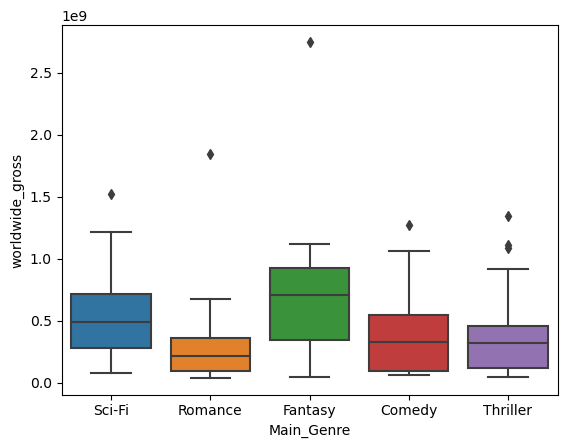

In [10]:
ax = sns.boxplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

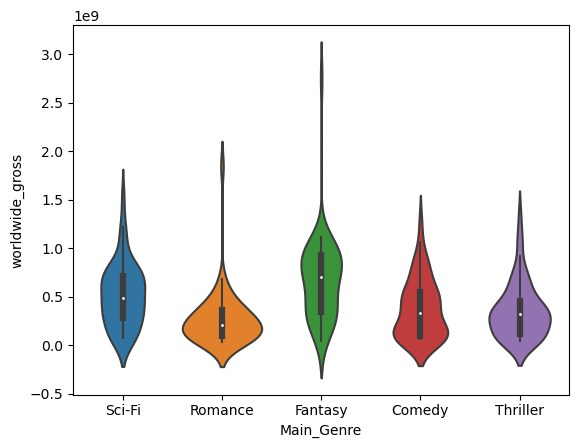

In [11]:
ax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

# 2. Exercises: Making more advanced visualizations


To make a good data visualization, we first need a clear idea of what we want to visualize! Do we aggregate the data, and how? What quantity should be on the different axis? How to use colors and item sizes? It often helps to sketch the visualization by hand before coding it up. By doing that, we can also give ourselves a moment to speculate what the visualization could look like under different hypotheses.

In the next three excercises, you are provided with descriptions and rough sketches of visualizations that are possibly useful to understand the movies dataset.


## 2.1 Visualizing uncertainty

- How did the average revenue of blockbusters evolve? Visualize the average yearly worldwide gross revenue, together with the standard deviation. Below, you are provided with two rough sketches of how the visualization could look like. We could indicate the margin of error with lines with caps, or by contouring between the upper and lower bound.

- Hints: use Matplotlib errorbar and fill_between functions.

- Did the average revenue increase/decrease over time? What do you observe?


<img src="figure0.jpg" style="width: 400px;" align="left" />
<img src="figure1.jpg" style="width: 400px;" align="left"/>


<br>


In [12]:
from functools import partial
import matplotlib.ticker as ticker

In [13]:
# Calculate yearly stats across movies here
movie_stats = movies[["worldwide_gross", "year"]].groupby("year").agg(['mean', partial(bootstrap_CI, nbr_draws=1000)])
movie_stats.columns
movie_stats['lower_bound'] = movie_stats[('worldwide_gross', 'bootstrap_CI')].str[0]
movie_stats['upper_bound'] = movie_stats[('worldwide_gross', 'bootstrap_CI')].str[1]
movie_stats

worldwide_gross                                             lower_bound  \
                mean                              bootstrap_CI                 
year                                                                           
1975    4.096674e+07    [36718935.28571428, 45443070.45714285]  3.671894e+07   
1976    6.642076e+07        [55282363.157500006, 80755511.655]  5.528236e+07   
1977    9.808576e+07  [59097449.019999996, 147587810.10749993]  5.909745e+07   
1978    8.944416e+07            [68803984.465, 111138338.8175]  6.880398e+07   
1979    8.086015e+07            [74578492.1225, 87492701.6775]  7.457849e+07   
1980    8.873752e+07        [68322534.03999999, 118557024.115]  6.832253e+07   
1981    8.992104e+07      [64735533.370000005, 120414799.4275]  6.473553e+07   
1982    1.256980e+08         [85167461.38, 184768050.62999997]  8.516746e+07   
1983    9.525617e+07        [71362628.82499999, 133567397.705]  7.136263e+07   
1984    1.291739e+08        [92510932.75500001, 167565179.455]  9.251093e+07   
1985    1.021618e+08              [76385128.24, 133153849.015]  7.638513e+07   
1986    1.128336e+08        [92363999.07249999, 137748960.435]  9.236400e+07   
1987    1.020567e+08         [77306350.14, 127732592.83749999]  7.730635e+07   
1988    1.107339e+08         [91034237.36, 131877889.91999999]  9.103424e+07   
1989    2.761461e+08            [218607580.28, 338175608.7725]  2.186076e+08   
1990    3.241124e+08            [252007515.8075, 404258237.19]  2.520075e+08   
1991    2.775128e+08      [216818131.32250002, 343284614.2975]  2.168181e+08   
1992    3.089338e+08      [256793589.4525, 369213713.73249996]  2.567936e+08   
1993    3.467768e+08      [246519991.3325, 486282491.55249995]  2.465200e+08   
1994    3.801087e+08              [281345174.59, 496631938.86]  2.813452e+08   
1995    3.258590e+08            [302522423.81, 346541577.8825]  3.025224e+08   
1996    3.849961e+08      [302720180.4825, 492930393.98749995]  3.027202e+08   
1997    5.137346e+08         [312109859.01, 830720608.2199999]  3.121099e+08   
1998    3.670852e+08           [318313210.505, 421584216.6475]  3.183132e+08   
1999    4.800680e+08      [388145017.97499996, 598609741.7375]  3.881450e+08   
2000    3.749659e+08       [333390288.555, 423975972.58750004]  3.333903e+08   
2001    5.270907e+08       [417908940.7625, 671060945.6274999]  4.179089e+08   
2002    5.668450e+08          [433805587.4425, 700690418.3425]  4.338056e+08   
2003    5.867333e+08            [461408033.71, 742218716.8525]  4.614080e+08   
2004    6.030925e+08             [497900559.6225, 715918506.8]  4.979006e+08   
2005    5.858617e+08             [474468014.0, 697124013.8975]  4.744680e+08   
2006    5.753496e+08       [463801319.4025, 719890582.7475001]  4.638013e+08   
2007    6.952406e+08         [581262815.6999999, 807203539.88]  5.812628e+08   
2008    6.365738e+08         [553513021.41, 735107378.5174999]  5.535130e+08   
2009    9.094390e+08          [624590464.3225, 1362300276.585]  6.245905e+08   
2010    7.579267e+08        [637969555.5975001, 876319889.855]  6.379696e+08   
2011    7.920100e+08             [646568843.7825, 952868511.4]  6.465688e+08   
2012    9.255655e+08           [788804352.87, 1096420675.3975]  7.888044e+08   
2013    8.847162e+08            [764964729.65, 1021635114.595]  7.649647e+08   
2014    7.885730e+08            [722574403.69, 874022613.1075]  7.225744e+08   
2015    4.004837e+08          [279399282.3725, 565241662.2525]  2.793993e+08   
2016    3.789137e+08      [334409825.9875, 426665891.21000004]  3.344098e+08   
2017    3.801477e+08        [318514098.45, 455850800.18249995]  3.185141e+08   
2018    3.786045e+08             [262949364.655, 512654639.76]  2.629494e+08   

       upper_bound  
                    
year                
1975  4.544307e+07  
1976  8.075551e+07  
1977  1.475878e+08  
1978  1.111383e+08  
1979  8.749270e+07  
1980  1.185570e+08  
1981  1.204148e+08  
1982  1.847681e+08  
1983  1.33567

In [14]:
ax = sns.pointplot(x='year', y='worldwide_gross', data=movies, 
estimator='mean', errorbar=partial(bootstrap_CI, nbr_draws=1000),
capsize=.6, errwidth=.4, markers='.', linestyles='-')
ax.set(xlabel='Year', ylabel='Mean worldwide gross')
ax.tick_params(axis='x', rotation=45 * 9)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [15]:
lower_err = movie_stats[('worldwide_gross', 'mean')] - movie_stats['lower_bound']
upper_err = -movie_stats[('worldwide_gross', 'mean')] + movie_stats['upper_bound']
err = np.stack([lower_err, upper_err])

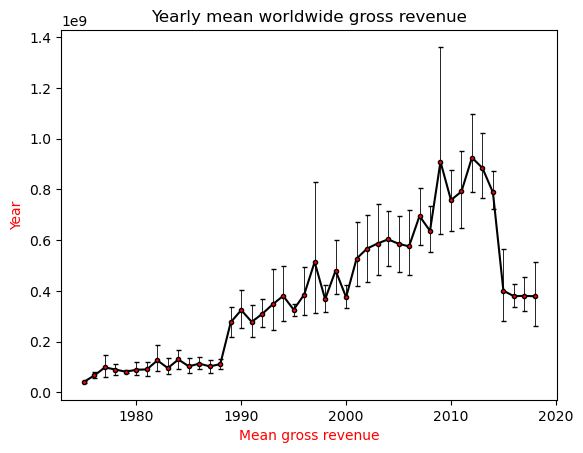

In [98]:
plt.errorbar(x=movie_stats.index, y=movie_stats[('worldwide_gross', 'mean')], yerr=err, 
capsize=1.8, ecolor='black', color='black', marker='.', mfc='red', elinewidth=0.6)
plt.xlabel('Mean gross revenue', fontdict={'color': 'red'})
plt.ylabel('Year', fontdict={'color': 'red'})
plt.title('Yearly mean worldwide gross revenue');

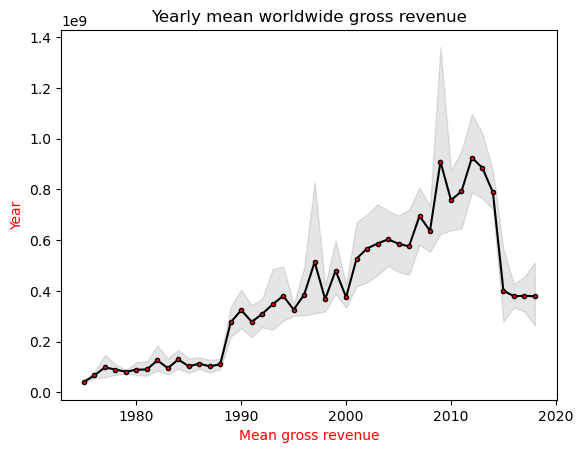

In [99]:
plt.plot(movie_stats.index, movie_stats[('worldwide_gross', 'mean')], color='black', marker='.', mfc='red')
plt.fill_between(movie_stats.index, y1=movie_stats['lower_bound'], y2=movie_stats['upper_bound'], color='black', alpha=0.1)
plt.xlabel('Mean gross revenue', fontdict={'color': 'red'})
plt.ylabel('Year', fontdict={'color': 'red'})
plt.title('Yearly mean worldwide gross revenue');

In [112]:
movies.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018


In 2010 movie gross peacked with 3D being the new facinating technology and the Avatar movie fully explointing this new type of entertainment. This explains the increase in movies gross for the period of 2010-2015. After that peoples excitement about 3d passed, which lead to a drop in movies gross. The 2015-2017 are also the years with average imdb rating drop from 7.45 (2014) to <=7.25 (2015-2017) 

## 2.2 Creating panels

- Next, we want to understand how long the blockbusters are in the different genres. When working with a large number of categories (we have 16 genres in the movies dataset), the visualizations easily become cluttered, and it becomes useful to make panels with small subplots.

- Make a 4x4 panel for the 16 genres. In each subplot, show a histogram with the distribution of movie lengths for different categories. Below, find a skets of how this visualization could look like. Note the same x- and y-scale that allows comparison between categories!

- Hints: use Matplotlib subplots function to initialize the subplotting axes.

- What genres do the longest movies belong too? What can you say about the length of Comedy and animation movies?

- How could we assign different color to each subplot (each genre)? What type of palette would be the best choice? Make a variation of the visualzation where each genre is visualized in a different color.

<img src="figure3.jpg" style="width: 500px;" align="left">

In [16]:
# Calculate stats by genre here
movie_stats = movies[["length", "Main_Genre"]].groupby("Main_Genre").agg(list)
movie_stats


,length
Main_Genre,
Action,"[135, 156, 129, 119, 147, 118, 135, 112, 152, ..."
Adventure,"[146, 122, 106, 139, 140, 127, 163, 121, 127, ..."
Animation,"[118, 90, 100, 90, 108, 108, 94, 91, 98, 91, 1..."
Comedy,"[102, 104, 88, 93, 102, 103, 106, 103, 93, 96,..."
Crime,"[128, 120, 147, 133, 128, 130, 111, 104, 85, 1..."
Drama,"[152, 187, 127, 155, 143, 130, 88, 124, 113, 8..."
Family,"[150, 88, 91, 103, 125, 120, 142, 103, 93, 102..."
Fantasy,"[144, 97, 142, 161, 143, 112, 169, 115, 136, 1..."
History,"[154, 140, 195, 27, 132]"


Text(0.08, 0.5, 'Number of movies')

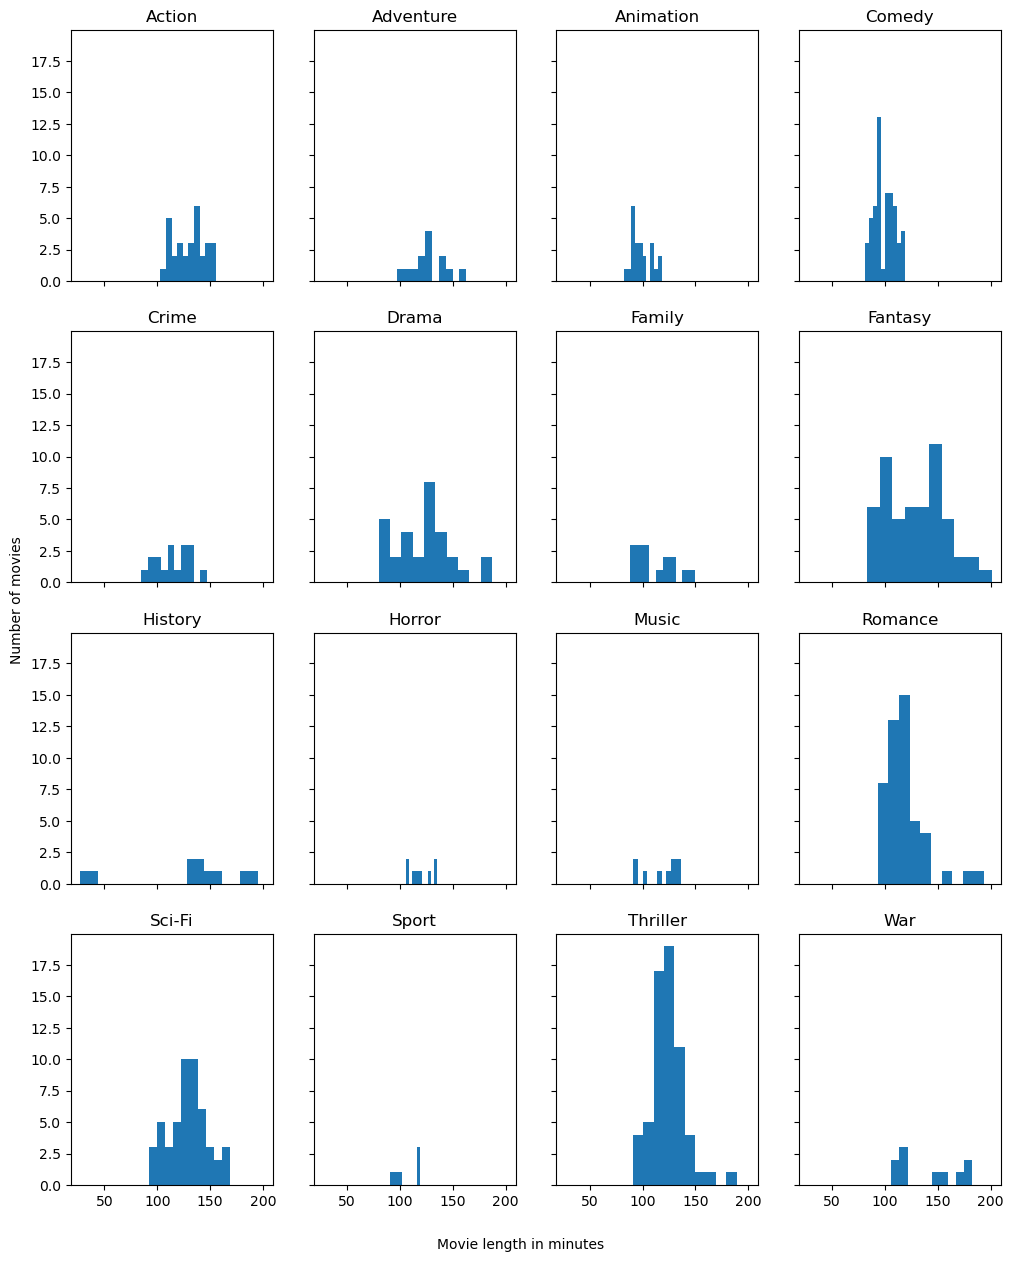

In [17]:
# Write your code to make 4x4 panel here
side = 4
fig, axs = plt.subplots(side, side, figsize=(12, 15), sharex=True, sharey=True)
for row_id, (row_name, row) in enumerate(movie_stats.iterrows()):
    i, j = row_id // side, row_id % side
    axs[i][j].hist(row, bins=10)
    axs[i][j].set_title(row_name)

fig.text(0.5, 0.07, 'Movie length in minutes', ha='center', va='center')
fig.text(0.08, 0.5, 'Number of movies', ha='center', va='center', rotation='vertical')


In [18]:
Movies length is usually in 90-120 interval, mostly the distribution of lengths is unimodal. 

## 2.3 Heatmaps

- What studios make blockbusters in which genre? 

- There are many studios and many genres. When working with two variables that both have many different categories, there is often no space for representing each combination of two categories with a detailed plot (such as barplot of boxplot). It becomes useful to represent each stratum with one number, indicated with color in a heatmap. Such visualizations are useful to quickly understand the data.

- Visualize the number of blockbusters made by each studio, of each genre. You will find below a rough sketch. Hint: use Seaborn heatmap function. 

- Finally, with a heatmap we can represent three variables, by coding a third variable with color. Try to understand what is the relationship between genres by understanding the co-occurence patterns between the main and secondary genre. What is the average worldwide gross revenue for movies with different combinations of main and second genre?

- You should be able to easily answer the following questions from the two visualizations: What genres do the majority of movies made by Warner Bros studio fall into? What is the most successful genre of Walt Disney pictures movies? What studio made the largest number of Romance blockbusters? Which combination of genres brings the highest revenue?



<img src="figure4.jpg" style="width: 500px;" align="left">

In [19]:
movies.head()

In [20]:
from optparse import Values
from turtle import title


genres = movies[['Main_Genre', 'studio', 'title']].groupby(['Main_Genre', 'studio']).agg('count')
genres.reset_index(level=1, inplace=True)
pivoted_genres = genres.pivot(columns='studio', values='title')
pivoted_genres.fillna(0, inplace=True)
pivoted_genres

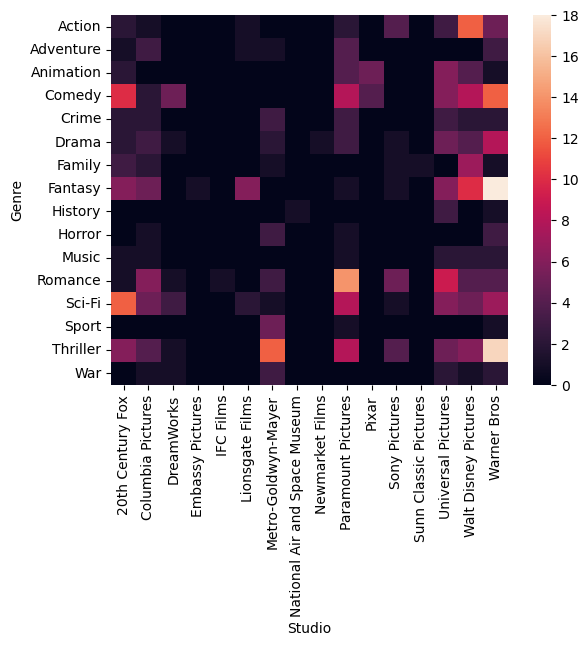

In [21]:
ax = sns.heatmap(data=pivoted_genres)
ax.set_xlabel('Studio')
ax.set_ylabel('Genre');

Thriller, comedy and fantasy seem to be most common genres out of the top-grossing ones. 
A war or history movie is rarely in the top-grossing ones and is covered by a few of the companies.
Uiversal Pictures, Walt Disney Pictures and Warner Bros make most movies in the top-grossing area and in most genres.


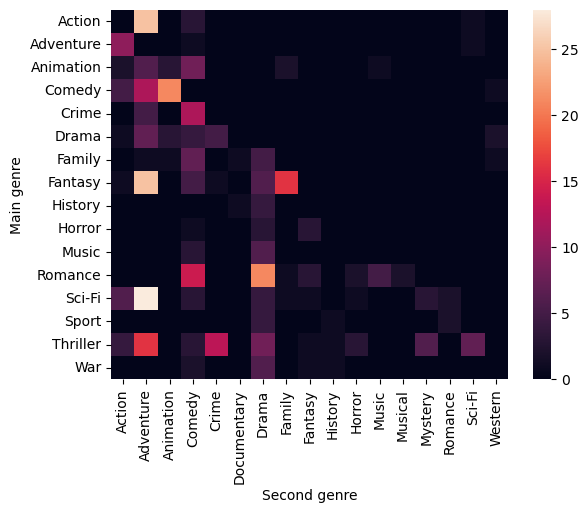

In [219]:
ax = sns.heatmap(pd.crosstab(movies['Main_Genre'], movies['Genre_2']));
ax.set_xlabel('Second genre')
ax.set_ylabel('Main genre');

Dramma can be the second genre for most of the other main genres. 
When sci-fi is the main genre usually the second genre is adventure. 
Adventure is a very popular second genre, but not as popular as first genre. 
Action, Adventure, Animation and Comedy are often co-occuring together. 

## 2.4 Be a show-off

Finally, we did not explore the impact of the rank of the movie among the top ten. How is the rank among the top ten related to the genres? What kind of visualization can be suitable to understand this better? To practice your data viz skills, sketch a potential visualization on a piece of paper, and then implement it using the appropriate type of visualization.

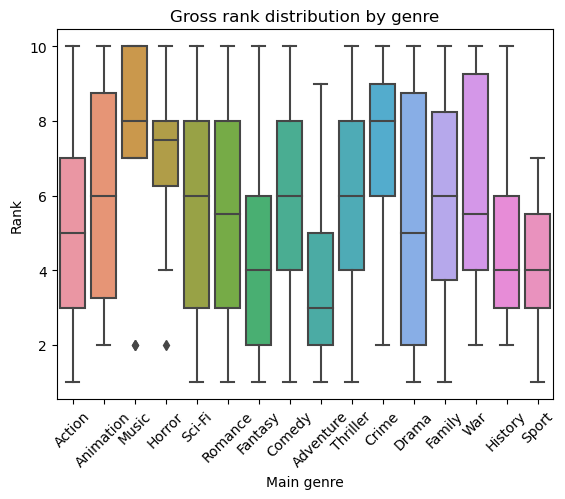

In [22]:
ax = sns.boxplot(data=movies, x='Main_Genre', y='rank_in_year')
ax.set_xlabel('Main genre')
ax.set_ylabel('Rank')
ax.set_title('Gross rank distribution by genre')
ax.tick_params(axis='x', rotation=45 * 9);

## Part 3: Visualizing skewed distributions

__3.A__ Familiarize yourself with the "pop_per_commune" dataframe, that contains information about each commune, and its population. Plot a histogram of the population counts (population_Dec) and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

In [23]:
pop_q99 = pop_per_commune['population_Dec'].quantile(0.99)
pop_per_commune[pop_per_commune['population_Dec'] > pop_q99].sort_values(ascending=False, by='population_Dec').head(10)

/var/folders/9t/5ml_m_x53vs0ydn7wx7l76l80000gn/T/ipykernel_10093/3842076042.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[i][j].set_ylim(0, 1)


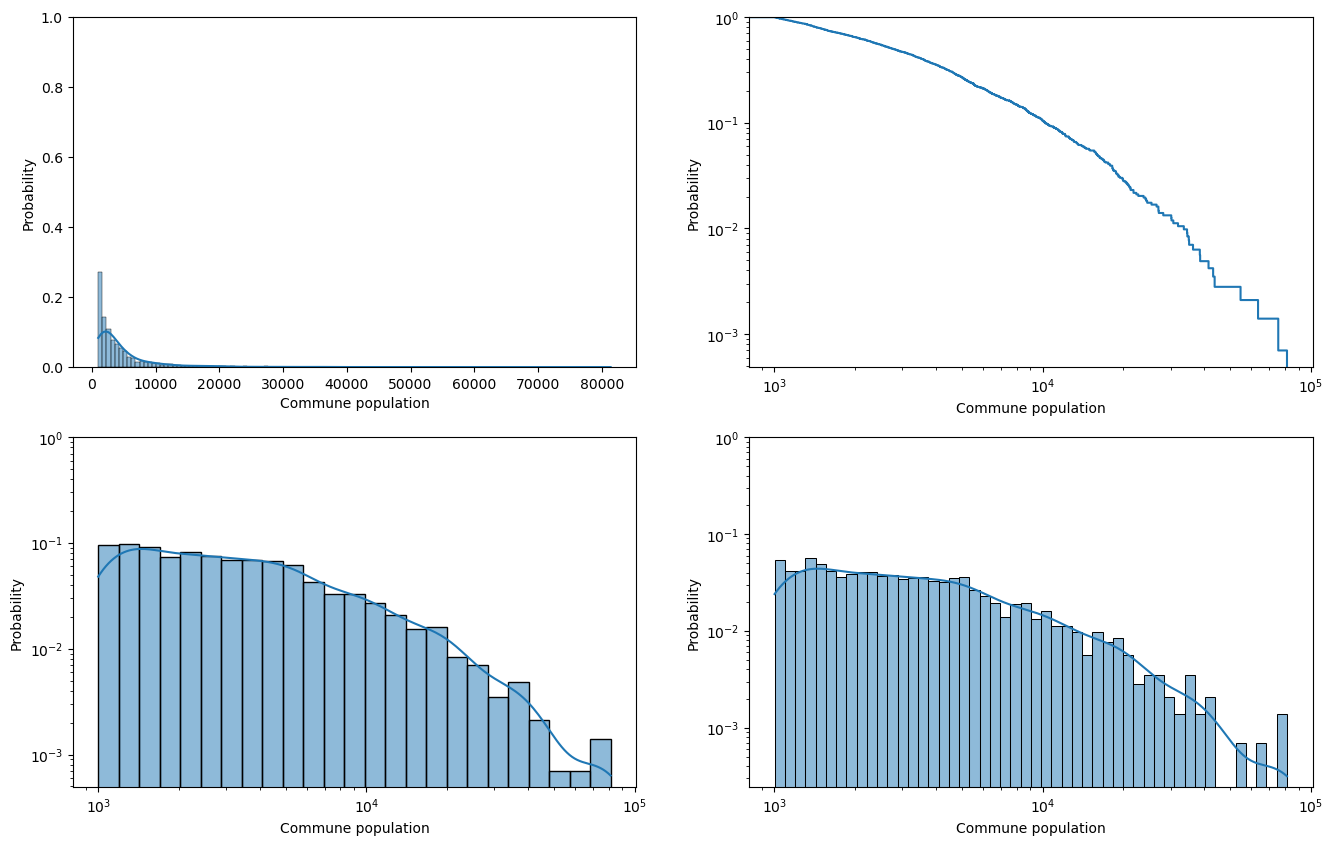

In [318]:
pop_per_commune_filtered = pop_per_commune[(pop_per_commune['population_Dec'] > 1000) & (pop_per_commune['population_Dec'] < 100000)]

side = 2
fix, axes = plt.subplots(side, side, figsize=(16, 10))
sns.histplot(data=pop_per_commune_filtered, x='population_Dec', kde=True, stat='probability', ax=axes[0][0]);
sns.histplot(data=pop_per_commune_filtered, x='population_Dec', kde=True, log_scale=(True, True), stat='probability', bins=25, ax=axes[1][0]);
sns.histplot(data=pop_per_commune_filtered, x='population_Dec', kde=True, log_scale=(True, True), stat='probability', bins=50, ax=axes[1][1]);
sns.ecdfplot(data=pop_per_commune_filtered, x='population_Dec', log_scale=(True, True), complementary=True, ax=axes[0][1]);

for i in range(side):
    for j in range(side):
        axes[i][j].set_xlabel('Commune population')
        axes[i][j].set_ylabel('Probability')
        axes[i][j].set_ylim(0, 1)
        




__3.B__ The figure below represents 4 types of histogram. At this stage, your distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as shown in Fig.(d), in which the y-axis represents the number of data points with values greater than y. Create the figures (b) and (d) using the data extracted for task 1A. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw.png" style="width: 600px;" align="left">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

In [24]:
The filtered population data filters the power law

In [25]:
# Write your interpretations here